In [1]:
from sklearn.datasets import load_digits

In [2]:
digits = load_digits()

In [6]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'target_names': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 'images': array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
         [ 0.,  0., 13., ..., 15.,  5.,  0.],
         [ 0.,  3., 15., ..., 11.,  8.,  0.],
         ...,
         [ 0.,  4., 11., ..., 12.,  7.,  0.],
         [ 0.,  2., 14., ..., 12.,  0.,  0.],
         [ 0.,  0.,  6., ...,  0.,  0.,  0.]],
 
        [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
         [ 0.,  0.,  0., ...,  9.,  0.,  0.],
         [ 0.,  0.,  3., ...,  6.,  0.,  0.],
         ...,
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  0., ..., 10.,  0.,  0.]],
 
        [[ 0

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

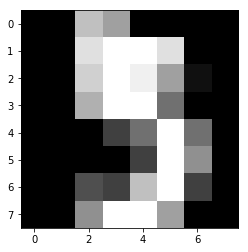

In [48]:

plt.imshow(digits.images[5], cmap='gray')

In [49]:

digits.target[5]

5

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
trainX, testX, trainY, testY = train_test_split(digits.data, digits.target)

In [9]:
from sklearn.tree import DecisionTreeClassifier

In [10]:
trainX.shape

(1347, 64)

In [11]:
dt = DecisionTreeClassifier()

In [34]:
params = {
    'max_features':[50,60],
    'max_depth':[8,10,12],
    'criterion':['entropy','gini']
}

In [35]:
from sklearn.model_selection import GridSearchCV

In [36]:
gs = GridSearchCV(dt, param_grid=params, cv=5, n_jobs=-1)

In [37]:
gs.fit(trainX,trainY)

C:\Users\aa\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_features': [50, 60], 'max_depth': [8, 10, 12], 'criterion': ['entropy', 'gini']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [39]:
gs.best_score_

0.85003711952487

In [40]:
gs.best_params_

{'criterion': 'entropy', 'max_depth': 12, 'max_features': 50}

In [41]:
best_model = gs.best_estimator_

In [42]:
best_model.score(testX,testY)

0.88